# Skyserver Project

In [378]:
# Importing Required libraries

In [407]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross
import warnings
warnings.filterwarnings('ignore')

In [380]:
df=pd.read_csv('Skyserver.csv')
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [381]:
df.tail()

objid          ra        dec         u         g         r  \
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233

In [382]:
df.shape

(10000, 18)

In [311]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [312]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [314]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [315]:
df.mean()

objid        1.237650e+18
ra           1.755300e+02
dec          1.483615e+01
u            1.861936e+01
g            1.737193e+01
r            1.684096e+01
i            1.658358e+01
z            1.642283e+01
run          9.810348e+02
rerun        3.010000e+02
camcol       3.648700e+00
field        3.023801e+02
specobjid    1.645022e+18
redshift     1.437257e-01
plate        1.460986e+03
mjd          5.294353e+04
fiberid      3.530694e+02
dtype: float64

In [316]:
# Summary Statistics

In [317]:
df.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

In [318]:
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [319]:
df.objid.unique()

array([1.23765e+18])

In [320]:
df.specobjid.unique()

array([3.72236e+18, 3.63814e+17, 3.23274e+17, ..., 5.03345e+17,
       5.03340e+17, 5.03341e+17])

In [321]:
df.camcol.unique()

array([4, 2, 1, 5, 6, 3], dtype=int64)

In [322]:
df.plate.unique()

array([3306,  323,  287,  324,  288, 2558, 2568, 3846, 3771,  274, 3833,
        275, 2559, 2569, 2389, 3786, 2409, 3834,  276,  307,  306,  536,
       4025, 4022,  308, 2934, 2909, 4745, 2057, 2077, 1149, 4788, 7450,
       7451,  346,  345,  282,  343,  364,  299,  300, 4043, 4040, 4041,
        301, 4037,  289,  270,  271, 3831,  272, 3835, 3772,  277,  537,
        309, 4019, 4018,  348, 2895,  291,  290, 4016,  310,  266,  480,
       3827,  267, 3828,  268, 2867, 2852, 3848, 2920, 3154,  481,  500,
        501,  302,  303, 3314,  342, 4668,  424,  425, 4665, 4661,  426,
        269, 3832,  273, 3836, 3787, 3773,  278, 3825,  476, 3826,  477,
       4737,  502, 4738, 3830,  304, 4032,  305, 4028,  918, 4029,  293,
        294, 4052, 4051, 7456, 2901,  539,  311,  312, 2952, 4014, 3829,
        462, 2050, 2070,  463, 1634, 7253,  279, 3788, 3837, 3838,  429,
       1898, 1899, 4658,  292, 3850, 3849,  280, 3774,  281, 3233,  919,
       4026,  295, 2926,  503,  464, 2051, 1635, 16

In [323]:
df.field.unique()

array([267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 310, 311, 312, 313, 502, 503, 504, 505, 506,
       508, 509, 510, 511, 512, 515, 516, 517, 518, 519, 520, 521, 522,
       104, 105, 110, 111, 112, 113, 114, 115, 116,  25,  26,  28,  29,
        90,  91,  92,  93,  95,  74,  70,  71,  66, 103, 538, 539, 567,
       568, 571, 573, 575, 576, 579, 580, 411, 414, 415, 416, 417, 418,
       420, 421, 422, 424, 425, 426, 427, 428, 430, 431, 432, 435, 437,
       438, 439, 440, 442, 443, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 244, 245, 246, 249, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 314, 315, 316, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 581, 583, 584, 585, 591, 607, 608, 167, 169, 536, 540, 563,
       569, 570, 577, 588, 590, 598, 602, 606, 205, 446, 197, 19

In [324]:
df.run.unique()

array([ 752,  756,  308,  727,  745, 1035, 1045, 1140, 1231, 1332, 1334,
       1302, 1239, 1119, 1331, 1345, 1350, 1404, 1412, 1336, 1402, 1411,
       1356], dtype=int64)

In [325]:
df.rerun.unique()

array([301], dtype=int64)

In [326]:
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   class  \
0     15.50342  15.22531   752    301       4    267  3.722360e+18    STAR   
1     16.48922  16.39150   752    301       4    267  3.638140e+17    STAR   
2     17.08732  16.80125   752    301       4    268  3.232740e+17  GALAXY   
3     15.98233  15.90438   752    301       4    269  3.722370e+18    STAR   
4     16.55492  16.61326   752    301       4    269  3.722370e+18    STAR   
...        ...       ...   ...    ...     ...    ...           ...     ...   
9995  16.68305  16.50570  1345    301       3    161  5.033450e+17  GALAXY   
9996  16.71661  16.69897  1345    301       3    162  5.033400e+17  GALAXY   
9997  17.43302  17.42048  1345    301       3    162  8.222620e+18    STAR   
9998  17.36284  17.13988  1345    301       3    163  5.033400e+17  GALAXY   
9999  15.83548  15.50588  1345    301       3    163  5.033410e+17  GALAXY   

      redshift  plate    mjd  fiberid  
0    -0.000009   3306  54922      491  
1    -0.000055    323  51615      541  
2     0.123111    287  52023      513  
3    -0.000111   3306  54922      510  
4     0.000590   3306  54922      512  
...        ...    ...    ...      ...  
9995  0.027583    447  51877      246  
9996  0.117772    447  51877      228  
9997 -0.000402   7303  57013      622  
9998  0.014019    447  51877      229  
9999  0.118417    447  51877      233  

[10000 rows x 18 columns]

In [384]:
df.drop(df.columns[[9]],axis=1,inplace=True)

In [385]:
df

objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598371   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  camcol  field     specobjid   class  redshift  \
0     15.50342  15.22531   752       4    267  3.722360e+18    STAR -0.000009   
1     16.48922  16.39150   752       4    267  3.638140e+17    STAR -0.000055   
2     17.08732  16.80125   752       4    268  3.232740e+17  GALAXY  0.123111   
3     15.98233  15.90438   752       4    269  3.722370e+18    STAR -0.000111   
4     16.55492  16.61326   752       4    269  3.722370e+18    STAR  0.000590   
...        ...       ...   ...     ...    ...           ...     ...       ...   
9995  16.68305  16.50570  1345       3    161  5.033450e+17  GALAXY  0.027583   
9996  16.71661  16.69897  1345       3    162  5.033400e+17  GALAXY  0.117772   
9997  17.43302  17.42048  1345       3    162  8.222620e+18    STAR -0.000402   
9998  17.36284  17.13988  1345       3    163  5.033400e+17  GALAXY  0.014019   
9999  15.83548  15.50588  1345       3    163  5.033410e+17  GALAXY  0.118417   

      plate    mjd  fiberid  
0      3306  54922      491  
1       323  51615      541  
2       287  52023      513  
3      3306  54922      510  
4      3306  54922      512  
...     ...    ...      ...  
9995    447  51877      246  
9996    447  51877      228  
9997   7303  57013      622  
9998    447  51877      229  
9999    447  51877      233  

[10000 rows x 17 columns]

In [386]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [387]:
df

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field     specobjid   class  redshift  plate    mjd  \
0      752       4    267  3.722360e+18    STAR -0.000009   3306  54922   
1      752       4    267  3.638140e+17    STAR -0.000055    323  51615   
2      752       4    268  3.232740e+17  GALAXY  0.123111    287  52023   
3      752       4    269  3.722370e+18    STAR -0.000111   3306  54922   
4      752       4    269  3.722370e+18    STAR  0.000590   3306  54922   
...    ...     ...    ...           ...     ...       ...    ...    ...   
9995  1345       3    161  5.033450e+17  GALAXY  0.027583    447  51877   
9996  1345       3    162  5.033400e+17  GALAXY  0.117772    447  51877   
9997  1345       3    162  8.222620e+18    STAR -0.000402   7303  57013   
9998  1345       3    163  5.033400e+17  GALAXY  0.014019    447  51877   
9999  1345       3    163  5.033410e+17  GALAXY  0.118417    447  51877   

      fiberid  
0         491  
1         541  
2         513  
3         510  
4         512  
...       ...  
9995      246  
9996      228  
9997      622  
9998      229  
9999      233  

[10000 rows x 16 columns]

In [377]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int64

In [330]:
le=LabelEncoder()
df['specobjid']=le.fit_transform(df['specobjid'])
df['specobjid']

0       5641
1       2267
2       1289
3       5642
4       5642
        ... 
9995    3999
9996    3997
9997    6240
9998    3997
9999    3998
Name: specobjid, Length: 10000, dtype: int64

In [331]:
df

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

      rerun  camcol  field  specobjid  class  redshift  plate    mjd  fiberid  
0       301       4    267       5641      2 -0.000009   3306  54922      491  
1       301       4    267       2267      2 -0.000055    323  51615      541  
2       301       4    268       1289      0  0.123111    287  52023      513  
3       301       4    269       5642      2 -0.000111   3306  54922      510  
4       301       4    269       5642      2  0.000590   3306  54922      512  
...     ...     ...    ...        ...    ...       ...    ...    ...      ...  
9995    301       3    161       3999      0  0.027583    447  51877      246  
9996    301       3    162       3997      0  0.117772    447  51877      228  
9997    301       3    162       6240      2 -0.000402   7303  57013      622  
9998    301       3    163       3997      0  0.014019    447  51877      229  
9999    301       3    163       3998      0  0.118417    447  51877      233  

[10000 rows x 16 columns]

In [332]:
# Data visualizations

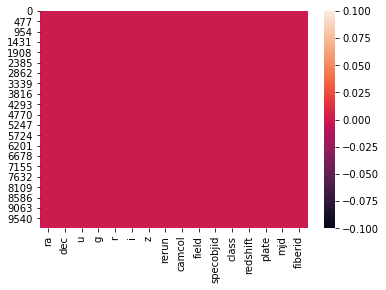

In [333]:
sns.heatmap(df.isnull())

In [334]:
df.isnull()

ra    dec      u      g      r      i      z  rerun  camcol  field  \
0     False  False  False  False  False  False  False  False   False  False   
1     False  False  False  False  False  False  False  False   False  False   
2     False  False  False  False  False  False  False  False   False  False   
3     False  False  False  False  False  False  False  False   False  False   
4     False  False  False  False  False  False  False  False   False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...    ...   
9995  False  False  False  False  False  False  False  False   False  False   
9996  False  False  False  False  False  False  False  False   False  False   
9997  False  False  False  False  False  False  False  False   False  False   
9998  False  False  False  False  False  False  False  False   False  False   
9999  False  False  False  False  False  False  False  False   False  False   

      specobjid  class  redshift  plate    mjd  fiberid  
0         False  False     False  False  False    False  
1         False  False     False  False  False    False  
2         False  False     False  False  False    False  
3         False  False     False  False  False    False  
4         False  False     False  False  False    False  
...         ...    ...       ...    ...    ...      ...  
9995      False  False     False  False  False    False  
9996      False  False     False  False  False    False  
9997      False  False     False  False  False    False  
9998      False  False     False  False  False    False  
9999      False  False     False  False  False    False  

[10000 rows x 16 columns]

In [335]:
# To check Correlation

In [336]:
dfcor=df.corr()
dfcor

ra       dec         u         g         r         i  \
ra         1.000000  0.003596  0.031238  0.043909  0.047103  0.045731   
dec        0.003596  1.000000  0.035279  0.061875  0.063404  0.058292   
u          0.031238  0.035279  1.000000  0.849232  0.692379  0.602630   
g          0.043909  0.061875  0.849232  1.000000  0.958106  0.907419   
r          0.047103  0.063404  0.692379  0.958106  1.000000  0.977672   
i          0.045731  0.058292  0.602630  0.907419  0.977672  1.000000   
z          0.042950  0.056870  0.551483  0.879622  0.969197  0.981507   
rerun           NaN       NaN       NaN       NaN       NaN       NaN   
camcol    -0.006294  0.114614  0.009945  0.010223  0.010747  0.013461   
field      0.594700 -0.131471  0.008548  0.014651  0.017133  0.019781   
specobjid -0.064326  0.367155 -0.164184 -0.100280 -0.025763  0.027016   
class     -0.043219 -0.058918 -0.269044 -0.099212  0.049628  0.146791   
redshift   0.030307  0.067021  0.163741  0.407576  0.441080  0.431450   
plate     -0.095329  0.088342 -0.129430 -0.054981  0.019787  0.072958   
mjd       -0.086887  0.066147 -0.168793 -0.092772 -0.009345  0.050896   
fiberid    0.057485  0.155012  0.011301  0.047187  0.061081  0.069977   

                  z  rerun    camcol     field  specobjid     class  redshift  \
ra         0.042950    NaN -0.006294  0.594700  -0.064326 -0.043219  0.030307   
dec        0.056870    NaN  0.114614 -0.131471   0.367155 -0.058918  0.067021   
u          0.551483    NaN  0.009945  0.008548  -0.164184 -0.269044  0.163741   
g          0.879622    NaN  0.010223  0.014651  -0.100280 -0.099212  0.407576   
r          0.969197    NaN  0.010747  0.017133  -0.025763  0.049628  0.441080   
i          0.981507    NaN  0.013461  0.019781   0.027016  0.146791  0.431450   
z          1.000000    NaN  0.010930  0.018248   0.067582  0.215758  0.424034   
rerun           NaN    NaN       NaN       NaN        NaN       NaN       NaN   
camcol     0.010930    NaN  1.000000 -0.067921   0.076472 -0.006186  0.006834   
field      0.018248    NaN -0.067921  1.000000  -0.056375  0.007713  0.015414   
specobjid  0.067582    NaN  0.076472 -0.056375   1.000000  0.565908 -0.057154   
class      0.215758    NaN -0.006186  0.007713   0.565908  1.000000 -0.075510   
redshift   0.424034    NaN  0.006834  0.015414  -0.057154 -0.075510  1.000000   
plate      0.112397    NaN  0.040795 -0.093723   0.728049  0.585495 -0.038091   
mjd        0.095658    NaN  0.026284 -0.086558   0.771821  0.648768 -0.057957   
fiberid    0.067980    NaN  0.535629 -0.040493   0.125264  0.053593  0.046532   

              plate       mjd   fiberid  
ra        -0.095329 -0.086887  0.057485  
dec        0.088342  0.066147  0.155012  
u         -0.129430 -0.168793  0.011301  
g         -0.054981 -0.092772  0.047187  
r          0.019787 -0.009345  0.061081  
i          0.072958  0.050896  0.069977  
z          0.112397  0.095658  0.067980  
rerun           NaN       NaN       NaN  
camcol     0.040795  0.026284  0.535629  
field     -0.093723 -0.086558 -0.040493  
specobjid  0.728049  0.771821  0.125264  
class      0.585495  0.648768  0.053593  
redshift  -0.038091 -0.057957  0.046532  
plate      1.000000  0.966881  0.229811  
mjd        0.966881  1.000000  0.190328  
fiberid    0.229811  0.190328  1.000000

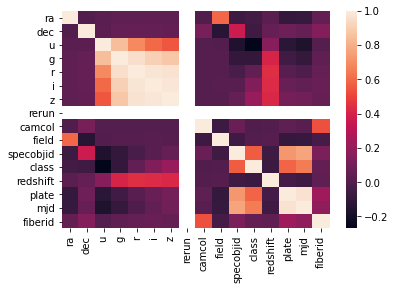

In [337]:
sns.heatmap(dfcor)

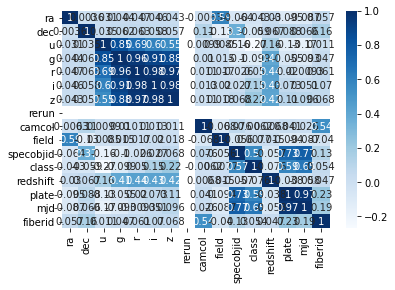

In [338]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

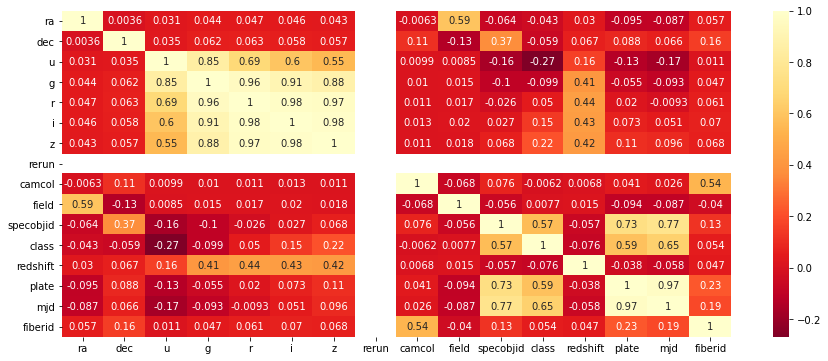

In [339]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [340]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   rerun  camcol  field  specobjid  class  redshift  plate    mjd  fiberid  
0    301       4    267       5641      2 -0.000009   3306  54922      491  
1    301       4    267       2267      2 -0.000055    323  51615      541  
2    301       4    268       1289      0  0.123111    287  52023      513  
3    301       4    269       5642      2 -0.000111   3306  54922      510  
4    301       4    269       5642      2  0.000590   3306  54922      512

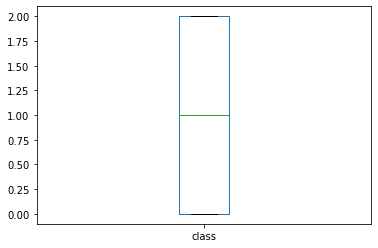

In [341]:
#univariate analysis
df['class'].plot.box()

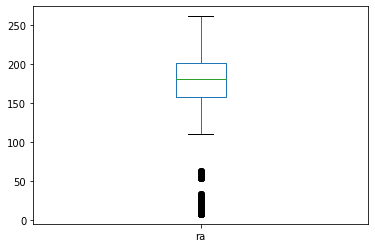

In [342]:
df['ra'].plot.box()

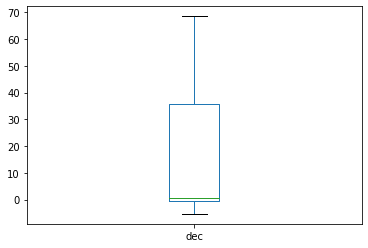

In [343]:
df['dec'].plot.box()

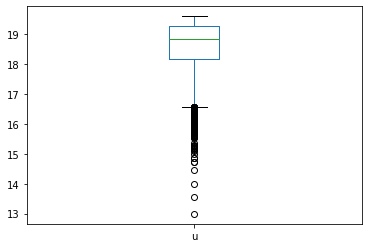

In [344]:
df['u'].plot.box()

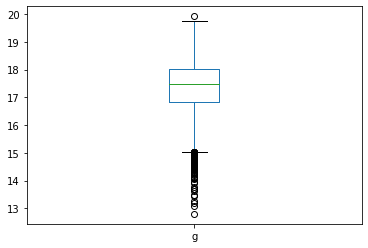

In [345]:
df['g'].plot.box()

In [346]:
collist=df.columns.values
ncol=12
nrows=10

In [347]:
plt.subplot?

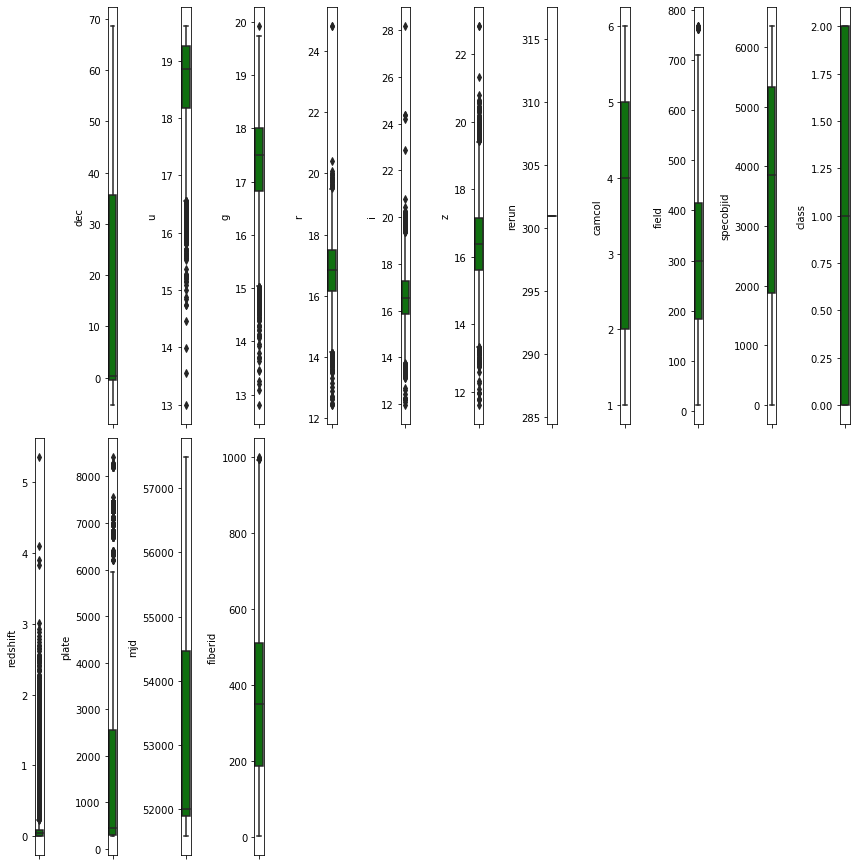

In [348]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

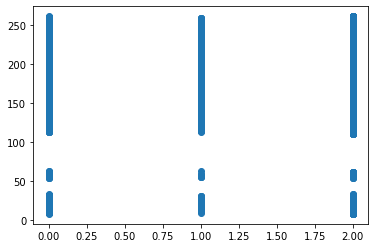

In [349]:
#bivariate analysis
plt.scatter(df['class'],df['ra'])

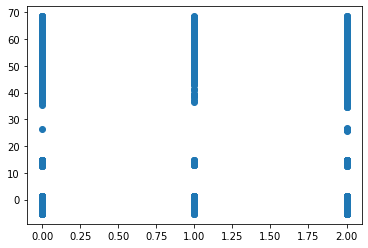

In [350]:
plt.scatter(df['class'],df['dec'])

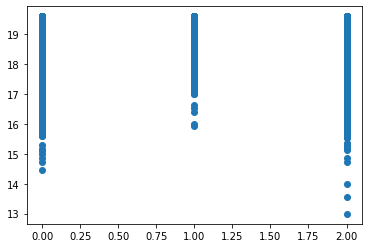

In [351]:
plt.scatter(df['class'],df['u'])

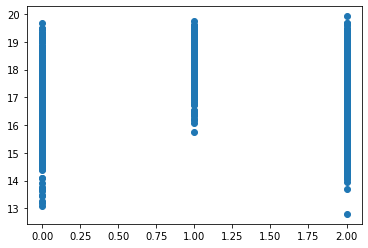

In [352]:
plt.scatter(df['class'],df['g'])

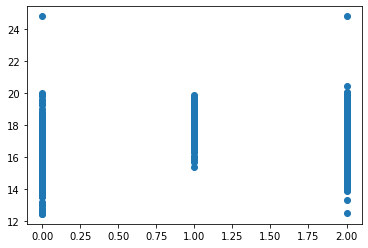

In [353]:
plt.scatter(df['class'],df['r'])

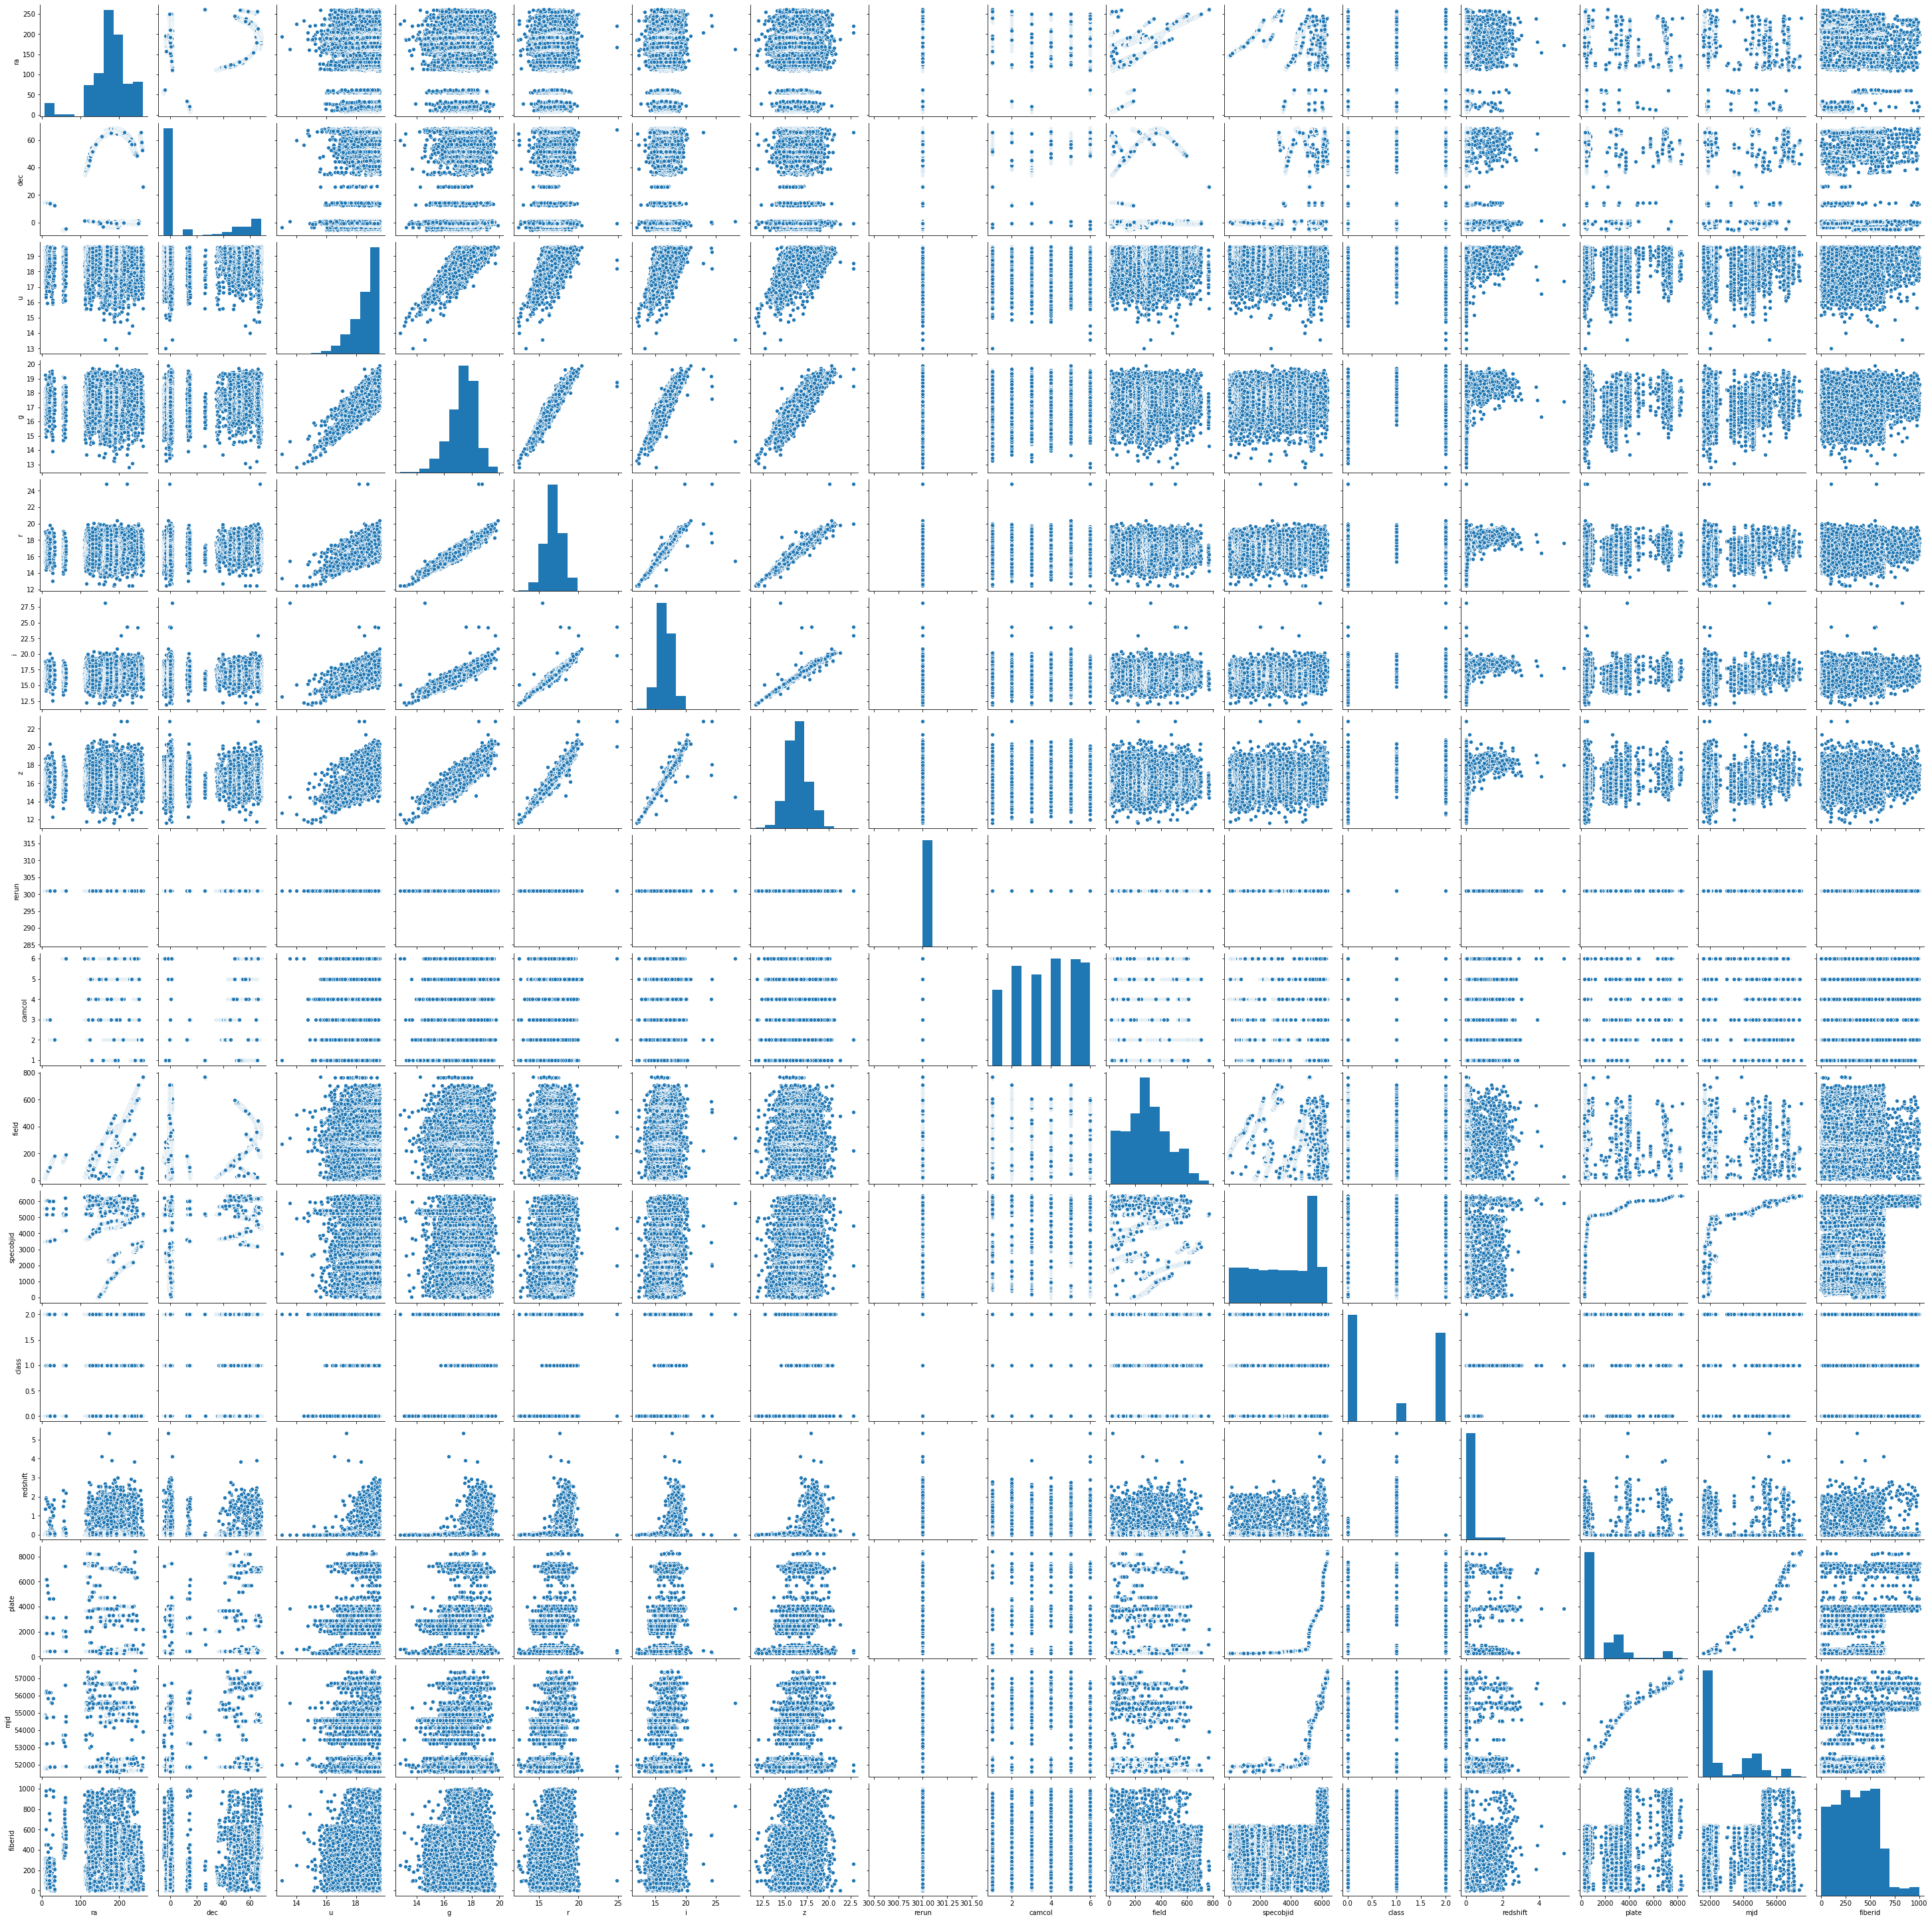

In [354]:
sns.pairplot(df)

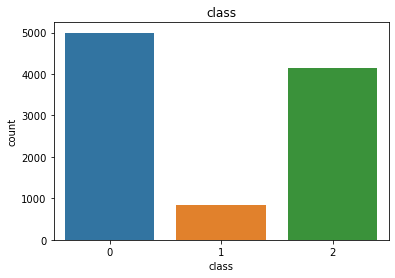

In [355]:
# Plotting the "class" Column

import seaborn as sn
sn.countplot(df["class"])
plt.title("class")
plt.show()

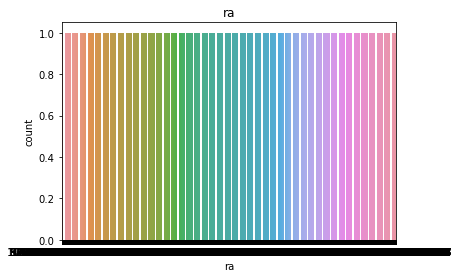

In [356]:
sn.countplot(df["ra"])
plt.title("ra")
plt.show()

In [357]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   rerun  camcol  field  specobjid  class  redshift  plate    mjd  fiberid  
0    301       4    267       5641      2 -0.000009   3306  54922      491  
1    301       4    267       2267      2 -0.000055    323  51615      541  
2    301       4    268       1289      0  0.123111    287  52023      513  
3    301       4    269       5642      2 -0.000111   3306  54922      510  
4    301       4    269       5642      2  0.000590   3306  54922      512

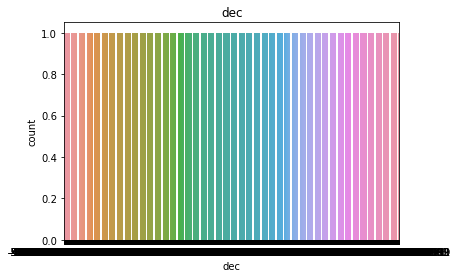

In [358]:
sn.countplot(df["dec"])
plt.title("dec")
plt.show()

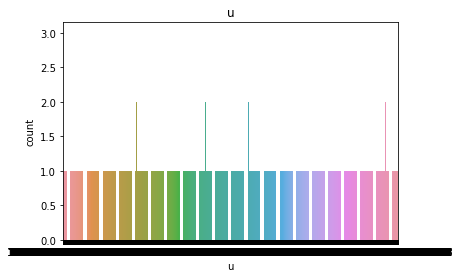

In [359]:
sn.countplot(df["u"])
plt.title("u")
plt.show()

In [360]:
# To check distribution of skewness

In [361]:
df.dtypes

ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
rerun          int64
camcol         int64
field          int64
specobjid      int64
class          int32
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

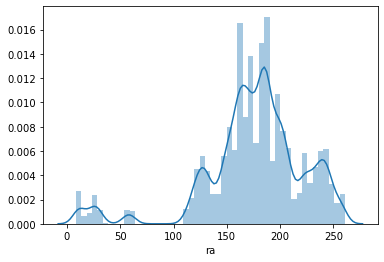

In [362]:
sns.distplot(df['ra'])

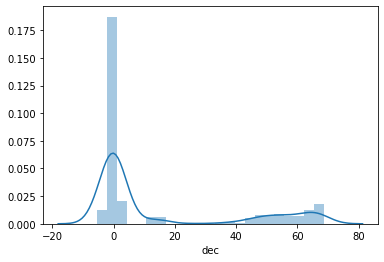

In [363]:
sns.distplot(df['dec'])

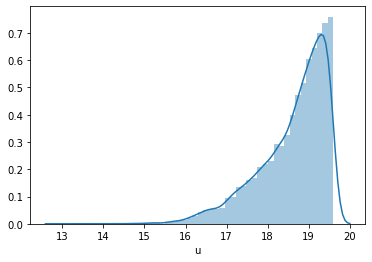

In [364]:
sns.distplot(df['u'])

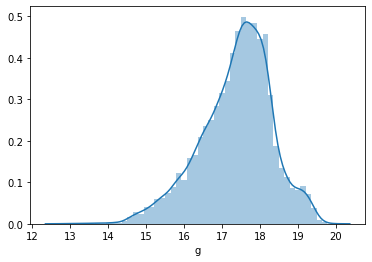

In [365]:
sns.distplot(df['g'])

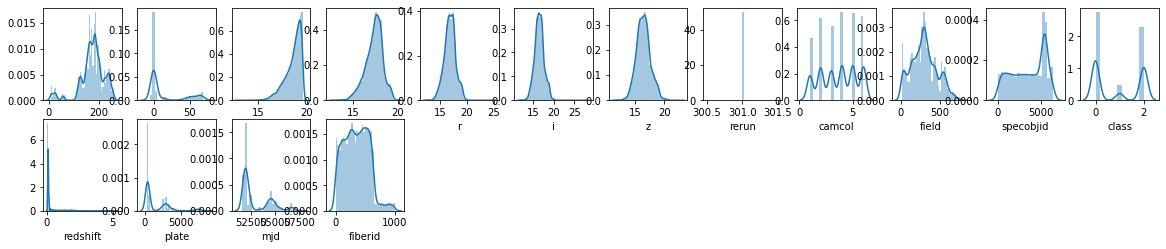

In [366]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [367]:
df.shape

(10000, 16)

In [368]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid   -0.323754
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [369]:
# Trating skewness via log method

for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [370]:
df.skew()

ra          -1.227350
dec          0.152301
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid   -0.323754
class        0.169292
redshift     3.513844
plate        0.696680
mjd          1.011097
fiberid      0.308053
dtype: float64

In [371]:
# Regressor Model Building

In [372]:
df

ra       dec         u         g         r         i         z  \
0     183.531326  0.085896  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371  0.126884  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207  0.118836  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529  0.048705  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288  0.097632  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...       ...       ...       ...       ...       ...       ...   
9995  131.316413  3.961566  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  3.964071  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  3.963989  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  3.965622  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  3.966612  19.27586  17.37829  16.30542  15.83548  15.50588   

      rerun  camcol  field  specobjid  class  redshift     plate        mjd  \
0       301       4    267       5641      2 -0.000009  8.103797  10.913687   
1       301       4    267       2267      2 -0.000055  5.780744  10.851587   
2       301       4    268       1289      0  0.116103  5.662960  10.859460   
3       301       4    269       5642      2 -0.000111  8.103797  10.913687   
4       301       4    269       5642      2  0.000590  8.103797  10.913687   
...     ...     ...    ...        ...    ...       ...       ...        ...   
9995    301       3    161       3999      0  0.027209  6.104793  10.856650   
9996    301       3    162       3997      0  0.111338  6.104793  10.856650   
9997    301       3    162       6240      2 -0.000402  8.896177  10.951052   
9998    301       3    163       3997      0  0.013922  6.104793  10.856650   
9999    301       3    163       3998      0  0.111915  6.104793  10.856650   

      fiberid  
0         491  
1         541  
2         513  
3         510  
4         512  
...       ...  
9995      246  
9996      228  
9997      622  
9998      229  
9999      233  

[10000 rows x 16 columns]

In [373]:
y=df.iloc[:,11]
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [388]:
x=df.drop(columns=["class"],axis=1)
x

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field     specobjid  redshift  plate    mjd  fiberid  
0      752       4    267  3.722360e+18 -0.000009   3306  54922      491  
1      752       4    267  3.638140e+17 -0.000055    323  51615      541  
2      752       4    268  3.232740e+17  0.123111    287  52023      513  
3      752       4    269  3.722370e+18 -0.000111   3306  54922      510  
4      752       4    269  3.722370e+18  0.000590   3306  54922      512  
...    ...     ...    ...           ...       ...    ...    ...      ...  
9995  1345       3    161  5.033450e+17  0.027583    447  51877      246  
9996  1345       3    162  5.033400e+17  0.117772    447  51877      228  
9997  1345       3    162  8.222620e+18 -0.000402   7303  57013      622  
9998  1345       3    163  5.033400e+17  0.014019    447  51877      229  
9999  1345       3    163  5.033410e+17  0.118417    447  51877      233  

[10000 rows x 15 columns]

In [416]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [417]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=55)

In [418]:
print(x_train.shape, '\t',x_test.shape)

(7800, 15) 	 (2200, 15)


In [419]:
print(y_train.shape, '\t' ,y_test.shape)

(7800,) 	 (2200,)


In [420]:
# Importing our Model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [421]:
# using algrithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is :', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score: ",r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is : 0.6584344224703935
Error:
Mean absolute error: 0.4151411142272624
Mean squared error: 0.30964969824948113
Root Mean Squared Error: 0.5564617671048759
r2_score:  0.6589878202278319
*************************************************************************************************************


Score of DecisionTreeRegressor() is : 1.0
Error:
Mean absolute error: 0.019545454545454546
Mean squared error: 0.022272727272727274
Root Mean Squared Error: 0.1492405014489273
r2_score:  0.9754714074656571
*************************************************************************************************************


Score of KNeighborsRegressor() is : 0.8205099974664052
Error:
Mean absolute error: 0.22227272727272726
Mean squared error: 0.24994545454545455
Root Mean Squared Error: 0.4999454515699233
r2_score:  0.7247391334125621
*************************************************************************************************************


Score of SVR() is : 0.800485

In [422]:
# Cross Validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m, 'is :')
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is :
Score: [0.66681281 0.62436743 0.61578851 0.67224439]
Mean Score: 0.6448032857478039
Standard deviation: 0.02498456795892919
*************************************************************************************************************


Score of DecisionTreeRegressor() is :
Score: [0.98139023 0.97313782 0.97078941 0.93604233]
Mean Score: 0.9653399489503033
Standard deviation: 0.017367103771141253
*************************************************************************************************************


Score of KNeighborsRegressor() is :
Score: [0.7184818  0.67468109 0.6241451  0.66309205]
Mean Score: 0.6701000082606171
Standard deviation: 0.03362569643019762
*************************************************************************************************************


Score of SVR() is :
Score: [0.80337441 0.75956206 0.71268711 0.81128013]
Mean Score: 0.7717259272875467
Standard deviation: 0.03936909639571408
****************************************

In [427]:
# All Algorithn by using for loop

model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
         RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
        
        
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('***************************************************************************************')
    print('\n')

Accuracy score of  LogisticRegression() is:
0.9736363636363636
[[1031    8   27]
 [  17  178    0]
 [   4    2  933]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1066
           1       0.95      0.91      0.93       195
           2       0.97      0.99      0.98       939

    accuracy                           0.97      2200
   macro avg       0.97      0.96      0.96      2200
weighted avg       0.97      0.97      0.97      2200

***************************************************************************************


Accuracy score of  GaussianNB() is:
0.9436363636363636
[[1024   36    6]
 [  18  177    0]
 [  55    9  875]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1066
           1       0.80      0.91      0.85       195
           2       0.99      0.93      0.96       939

    accuracy                           0.94      2200
   macro avg       0.91      

In [434]:
# DecisionTree Regression with best parameters

dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9804545454545455
[[1045   21    0]
 [  20  175    0]
 [   2    0  937]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1066
           1       0.89      0.90      0.90       195
           2       1.00      1.00      1.00       939

    accuracy                           0.98      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.98      0.98      0.98      2200



In [438]:
# cross Validate DecisionTree Regression

score=cross_val_score(dt,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.98052466 0.97671944 0.96809305 0.81995479]
Mean Score: 0.936322985982769
Standard deviation: 0.06733601441119025


In [439]:
# Using Ensemble Technique to Boostup our score

In [449]:
# Using DecisionTree 

from sklearn.tree import DecisionTreeClassifier
DecisionTreeRegressor(random_state=59)
dt.fit(x_train,y_train)
print('Score:',dt.score(x_train,y_train))
predrf=dt.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error :', mean_squared_error(y_test,preddt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print("r2_score:",r2_score(y_test,preddt))

Score: 1.0


Mean absolute error: 0.020454545454545454
Mean squared error : 0.022272727272727274
Root Mean Squared Error: 0.1492405014489273


r2_score: 0.9754714074656571


In [450]:
# cross Validate DecisionTree Regression

score=cross_val_score(dt,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.98052466 0.97671944 0.96809305 0.81995479]
Mean Score: 0.936322985982769
Standard deviation: 0.06733601441119025


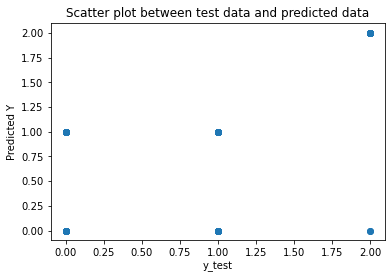

In [455]:
#plotting scatter plot between test data and predicted data for Ada Boost

plt.scatter(y_test,preddt)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [456]:
#Saving the DecisionTreeRegressor

In [457]:
df1=pd.DataFrame(preddt)
df1.to_csv('dt_predicton.csv')

In [458]:
#Saving the DecisionTreeRegressor with Pickle 

In [459]:
import joblib
joblib.dump(dt,'Skyserver.pkl')

['Skyserver.pkl']